In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import torch
import numpy as np
from  pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(parent_dir)

In [29]:
from utils.data import load_data, verify_data, generate_uniform_grid, PorosityDataset

In [6]:
nn = torch.nn
F = nn.functional
tu = torch.utils
tud = tu.data

In [7]:
grid, pores, density = load_data("../../Assignment_Data/")

In [8]:
grid.keys()

dict_keys(['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '1

In [9]:
for k,v in density.items():
    if v == 0.3900:
        print(k, v)

209 0.39
395 0.39


In [25]:
verify_data(grid['322'])

Min x: 0.0 Max x: 1.0
Min y: 0.0 Max y: 1.0
Min z: 0.0 Max z: 1.0
Min ix: 0 Max ix: 29
Min iy: 0 Max iy: 29
Min iz: 0 Max iz: 29
Number of unique indices: 19683
Expected number of unique indices: 27000
The coordinates do not cover the entire grid without gaps!
Duplicate indices found: {(0, 0, 6): 2, (0, 0, 13): 2, (0, 0, 27): 2, (0, 1, 6): 2, (0, 1, 13): 2, (0, 1, 27): 2, (0, 2, 6): 2, (0, 2, 13): 2, (0, 2, 27): 2, (0, 3, 6): 2, (0, 3, 13): 2, (0, 3, 27): 2, (0, 4, 6): 2, (0, 4, 13): 2, (0, 4, 27): 2, (0, 5, 6): 2, (0, 5, 13): 2, (0, 5, 27): 2, (0, 6, 0): 2, (0, 6, 1): 2, (0, 6, 2): 2, (0, 6, 3): 2, (0, 6, 4): 2, (0, 6, 5): 2, (0, 6, 6): 4, (0, 6, 8): 2, (0, 6, 9): 2, (0, 6, 10): 2, (0, 6, 11): 2, (0, 6, 12): 2, (0, 6, 13): 4, (0, 6, 15): 2, (0, 6, 16): 2, (0, 6, 17): 2, (0, 6, 18): 2, (0, 6, 19): 2, (0, 6, 20): 2, (0, 6, 21): 2, (0, 6, 22): 2, (0, 6, 23): 2, (0, 6, 24): 2, (0, 6, 25): 2, (0, 6, 26): 2, (0, 6, 27): 4, (0, 6, 29): 2, (0, 8, 6): 2, (0, 8, 13): 2, (0, 8, 27): 2, (0, 9, 6)

Shape of label grid: (30, 30, 30)
Number of unique indices: 27000
Expected number of unique indices: 27000


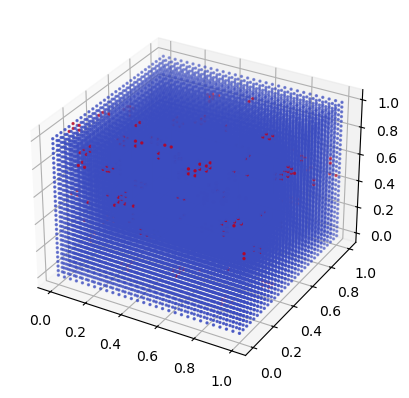

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.03448276, 0.        ],
       [0.        , 0.        , 0.06896552, 0.        ],
       ...,
       [1.        , 1.        , 0.93103448, 0.        ],
       [1.        , 1.        , 0.96551724, 0.        ],
       [1.        , 1.        , 1.        , 0.        ]])

In [30]:
generate_uniform_grid(grid['209'][:, 3])

In [11]:
grid['209'].shape

(27000, 4)

In [80]:
pores['209']

(30, 30, 30)

In [36]:
# x, y, z = np.indices(pores['209'].shape)
x_vals = np.linspace(0, 1, 30)
y_vals = np.linspace(0, 1, 30)
z_vals = np.linspace(0, 1, 30)
# Create a mesh grid for the coordinates
x_grid, y_grid, z_grid = np.meshgrid(x_vals, y_vals, z_vals)
# Flatten the grid to create a list of (x, y, z) coordinates
# coordinates = np.stack([x_grid.flatten(), y_grid.flatten(), z_grid.flatten()], axis=-1)

In [34]:
x = x.flatten()
y = y.flatten()
z = z.flatten()

values = pores['209'].flatten()

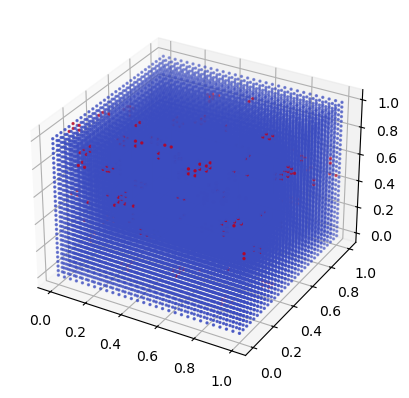

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
# ax.scatter(x, y, z, c=values, cmap='coolwarm', marker='o', s=2)
ax.scatter(x_grid.flatten(), y_grid.flatten(), z_grid.flatten(), c=values, cmap='coolwarm', marker='o', s=2)

In [38]:
grid_size = 30
label_grid = np.zeros((grid_size, grid_size, grid_size))
for entry in grid['209']:
    x, y, z, flag = entry
    # Map the coordinates to grid indices (since coordinates are between 0 and 1)
    ix, iy, iz = int(x * (grid_size - 1)), int(y * (grid_size - 1)), int(z * (grid_size - 1))
    label_grid[ix, iy, iz] = flag  

In [42]:
(label_grid.flatten() == grid['209'][:, 3]).all()

False

In [43]:
verify_data(label_grid)

Min x: 0.0 Max x: 1.0
Min y: 0.0 Max y: 1.0
Min z: 0.0 Max z: 1.0
Min ix: 0 Max ix: 29
Min iy: 0 Max iy: 29
Min iz: 0 Max iz: 29
Number of unique indices: 12
Expected number of unique indices: 27000
The coordinates do not cover the entire grid without gaps!


TypeError: unhashable type: 'numpy.ndarray'

In [71]:
data = grid['209'][grid['209'][:, 3] == 1]

In [61]:
data = grid['209'].reshape(-1, 4)

({'000': array([[0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.03448276, 0.        ],
         [0.        , 0.        , 0.06896552, 0.        ],
         ...,
         [1.        , 1.        , 0.93103448, 0.        ],
         [1.        , 1.        , 0.96551724, 0.        ],
         [1.        , 1.        , 1.        , 0.        ]]),
  '001': array([[0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.03448276, 0.        ],
         [0.        , 0.        , 0.06896552, 0.        ],
         ...,
         [1.        , 1.        , 0.93103448, 0.        ],
         [1.        , 1.        , 0.96551724, 0.        ],
         [1.        , 1.        , 1.        , 0.        ]]),
  '002': array([[0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.03448276, 1.        ],
         [0.        , 0.        , 0.06896552, 1.        ],
         ...,
         [1.        , 1.        , 0.93103448, 1.

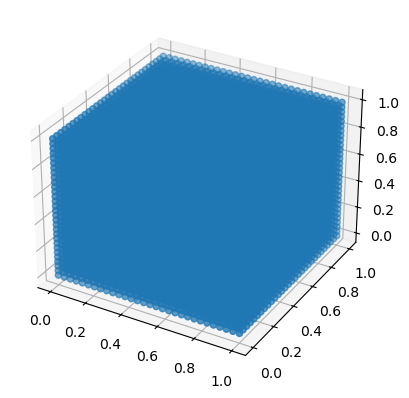

In [73]:
index = '209'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(pores[index][:, 0, 0], pores[index][:, 1], pores[index][:, 2])  

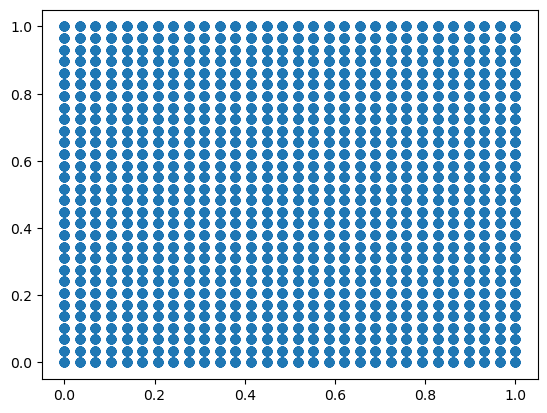

In [11]:
plt.scatter(data[:, 0], data[:, 1])

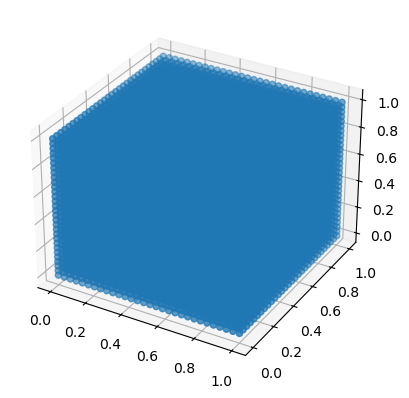

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data[:, 0], data[:, 1], data[:, 2])  

In [19]:
data[:, 3].sum()

5025.0

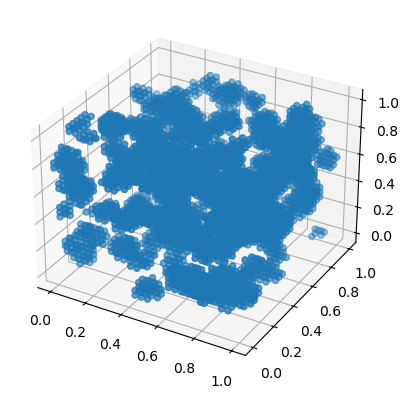

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2])  

In [27]:
data2 = np.load(files[1])
filtered_data2 = data2[data2[:, 3] == 1]

In [ ]:
filtered_data2  = data[data[:, 3] == 1]

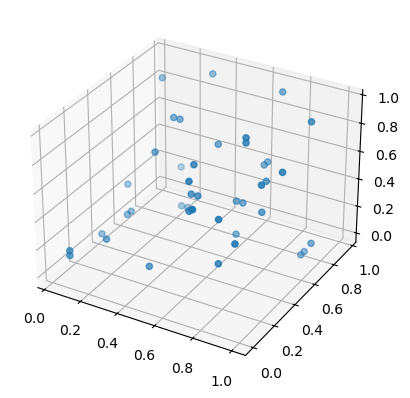

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(filtered_data2[:, 0], filtered_data2[:, 1], filtered_data2[:, 2])  

In [50]:
for file in files:
    tmp_data = np.load(file)
    filtered_data = tmp_data[tmp_data[:, 3] == 1][:, :3]
    print(filtered_data.mean())
    print(filtered_data.std())
    print(filtered_data.shape)
    print('-------------------')

0.5154777834963116
0.2850159029455655
(5025, 3)
-------------------
0.5068418171866449
0.2906306014923199
(42, 3)
-------------------
0.5122768679786852
0.283348214797401
(7953, 3)
-------------------
0.4602490421455939
0.26312549948406055
(24, 3)
-------------------
0.4983672017718285
0.2898388978019666
(1422, 3)
-------------------
0.5089632492605438
0.2988636178291923
(3649, 3)
-------------------
0.49993139898961975
0.2813387487244491
(5613, 3)
-------------------
0.5113468906572354
0.29586633025968306
(1092, 3)
-------------------
0.51585414189457
0.28739656940661545
(58, 3)
-------------------
0.49982102374418325
0.29081573530587024
(289, 3)
-------------------
0.5051138342674393
0.2908710658025228
(363, 3)
-------------------
0.515663681220011
0.2906273912761434
(4058, 3)
-------------------
0.5431034482758621
0.28923238164245507
(8, 3)
-------------------
0.4294670846394984
0.2908780115275748
(22, 3)
-------------------
0.5125136914895021
0.2936140873550727
(3484, 3)
----------

/idiap/temp/imitro/.cache/pip/ipykernel_14254/1228749305.py:4: RuntimeWarning: Mean of empty slice.
  print(filtered_data.mean())
/idiap/temp/imitro/miniconda3/envs/venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/idiap/temp/imitro/miniconda3/envs/venv/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/idiap/temp/imitro/miniconda3/envs/venv/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/idiap/temp/imitro/miniconda3/envs/venv/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.5113282867893935
0.29215017398245213
(7826, 3)
-------------------
0.5517241379310346
0.31383730899944934
(4, 3)
-------------------
0.48301700440016754
0.289469414907362
(7518, 3)
-------------------
0.5229885057471264
0.27060361763203566
(6, 3)
-------------------
0.4917847198849555
0.28424160975253027
(1127, 3)
-------------------
0.49578093306288035
0.2905675815103132
(850, 3)
-------------------
0.44861392832995267
0.27231450917679073
(714, 3)
-------------------
0.5139978929175989
0.2901458367198909
(971, 3)
-------------------
0.48785803878025213
0.2932244679288783
(559, 3)
-------------------
0.498058262535399
0.29325498656896226
(2208, 3)
-------------------
0.5230387136076691
0.2946578007875679
(3434, 3)
-------------------
0.5012186677745465
0.29203998275461707
(8300, 3)
-------------------
0.490442258908872
0.28380124323394407
(6262, 3)
-------------------
0.5056265573506953
0.2767990482128229
(286, 3)
-------------------
0.5068523430592395
0.29718179605422756
(104, 3)
--

In [53]:
for dat in tmp_data[tmp_data[:, 3] == 1][:, :3]:
    print(dat, dat.mean(), dat.std())
    print('-------------------')

[0.03448276 0.03448276 0.20689655] 0.09195402298850575 0.08127664151569512
-------------------
[0.03448276 0.55172414 0.55172414] 0.37931034482758613 0.24382992454708535
-------------------
[0.03448276 0.68965517 0.03448276] 0.2528735632183908 0.30885123775964146
-------------------
[0.03448276 0.68965517 0.06896552] 0.26436781609195403 0.3010528931887079
-------------------
[0.03448276 0.68965517 0.65517241] 0.4597701149425288 0.3010528931887079
-------------------
[0.03448276 0.68965517 0.68965517] 0.47126436781609193 0.30885123775964146
-------------------
[0.03448276 0.93103448 0.86206897] 0.6091954022988505 0.4073573596935483
-------------------
[0.03448276 0.93103448 0.89655172] 0.6206896551724138 0.41474985178548773
-------------------
[0.03448276 0.96551724 0.86206897] 0.6206896551724137 0.41665675771015764
-------------------
[0.03448276 0.96551724 0.89655172] 0.632183908045977 0.4235753051192708
-------------------
[0.06896552 0.68965517 0.03448276] 0.26436781609195403 0.3010

In [54]:
torch.full((10,), 0.9)

tensor([0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000])

In [60]:
data.shape

(27000, 4)

In [100]:
data[:, 3][:30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.])

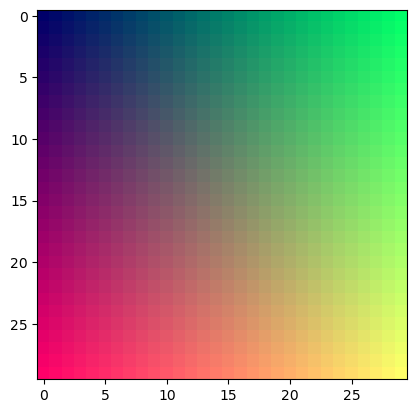

In [95]:
plt.imshow(data.reshape(30, 30, 30, 4)[:, :, 12, :3].squeeze())

In [85]:
plt.imshow?

Signature:
plt.imshow(
    X: 'ArrayLike | PIL.Image.Image',
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    *,
    aspect: "Literal['equal', 'auto'] | float | None" = None,
    interpolation: 'str | None' = None,
    alpha: 'float | ArrayLike | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    origin: "Literal['upper', 'lower'] | None" = None,
    extent: 'tuple[float, float, float, float] | None' = None,
    interpolation_stage: "Literal['data', 'rgba'] | None" = None,
    filternorm: 'bool' = True,
    filterrad: 'float' = 4.0,
    resample: 'bool | None' = None,
    url: 'str | None' = None,
    data=None,
    **kwargs,
) -> 'AxesImage'
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image, set up the colormapping using the parameters
``cmap='gray', vmin

In [ ]:
im1 = img[:, :, :, 0]  # first channel 
im2 = img[:, :, :, 1]  # second channel 
im3 = img[:, :, :, 2]  # third channel

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(im1)
ax[0].set_title('Channel 1')

ax[1].imshow(im2)
ax[1].set_title('Channel 2')

ax[2].imshow(im3)
ax[2].set_title('Channel 3')
plt.show()

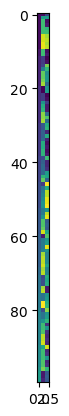

In [70]:
plt.imshow(filtered_data[:100])

In [101]:
import pytorch_lightning as pl

/idiap/temp/imitro/miniconda3/envs/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [102]:
import seaborn as sns

In [7]:
from utils.data import PorosityDataset

In [9]:
dataset = PorosityDataset("../../Assignment_Data/")

In [10]:
dataloader = tud.DataLoader(dataset, batch_size=32, shuffle=True)

In [11]:
pores, density = next(iter(dataloader))

In [12]:
pores.shape

torch.Size([32, 1, 30, 30, 30])

In [13]:
density.shape

torch.Size([32, 1])

In [15]:
pores[10].squeeze().shape

torch.Size([30, 30, 30])

In [16]:
density[10]

tensor([0.3900])

In [17]:
tmp_pores = pores[10].squeeze().numpy()

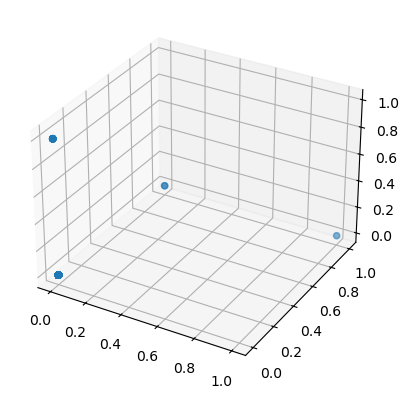

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(tmp_pores[:, 0], tmp_pores[:, 1], tmp_pores[:, 2])  